In [38]:
import os
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans


In [39]:
DATA_PATH = '../data/trump_posts_emotions.csv'
df = pd.read_csv(DATA_PATH, error_bad_lines=False, index_col=False)
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,text_cleaned,emotional_state,date,duration,mood_label,emotions_vector
0,Twitter for iPhone,Democrats just blocked @FoxNews from holding a...,3/7/19 0:05,39620,163793,False,1.103450e+18,democrat block hold debat good think thing fak...,[[[0. 0. 0. 0. ...,2019-03-07 00:05:00,431700.0,97,"[0.0, 0.0, 0.0, 0.0, 0.33333333, 0.7345, 0.352..."
1,Twitter for iPhone,Wall Street Journal: “More migrant families cr...,3/7/19 0:02,23578,94096,False,1.103450e+18,wall street journal migrant famili cross u ill...,[[[0.25 0.448 0.321 0.569]\n [0. 0. 0....,2019-03-07 00:02:00,431880.0,59,"[0.25, 0.448, 0.321, 0.569, 0.0, 0.0, 0.0, 0.0..."
2,Twitter for iPhone,Congressman Chris Stewart: “No one is accusing...,3/6/19 23:56,24546,88892,False,1.103440e+18,congressman chri stewart one accus presid crim...,[[[0.5 0.071 0.943 0.63 ]\n [0. 0. 0....,2019-03-06 23:56:00,432240.0,9,"[0.5, 0.071, 0.943, 0.63, 0.0, 0.0, 0.0, 0.0, ..."
3,Twitter for iPhone,American Workforce Policy Advisory Board Meeti...,3/6/19 22:04,10818,43018,False,1.103420e+18,american workforc polici advisori board meet,[[[0. 0. 0. 0. ]\n [1. 0.592 0....,2019-03-06 22:04:00,438960.0,81,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.592, 0.255, 0.385,..."
4,Twitter for iPhone,It is shameful that House Democrats won’t take...,3/6/19 19:50,28268,107157,False,1.103380e+18,shame hous democrat take stronger stand anti s...,[[[0.25 0.102 0.793 0.625]\n [0. 0. 0....,2019-03-06 19:50:00,447000.0,24,"[0.25, 0.102, 0.793, 0.625, 0.0, 0.0, 0.0, 0.0..."
5,Twitter for iPhone,Senate Republicans are not voting on constitut...,3/6/19 17:54,30224,115053,False,1.103350e+18,senat republican vote constitution preced vote...,[[[0.16666667 0.582 0.5 0.649 ...,2019-03-06 17:54:00,453960.0,10,"[0.16666667, 0.582, 0.5, 0.649, 0.16666667, 0...."
6,Twitter for iPhone,RT @DonaldJTrumpJr: Jim Jordan: No evidence of...,3/6/19 4:54,29410,0,True,1.103160e+18,rt jim jordan evid trump collud russia kind sh...,[[[0. 0. 0. 0. ]\n [0. 0. ...,2019-03-06 04:54:00,500760.0,24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,Twitter for iPhone,Weirdo Tom Steyer doesn’t have the “guts” or m...,3/6/19 4:53,15121,61609,False,1.103160e+18,weirdo tom steyer gut money run presid talk,[[[0.14285714 0.844 0.608 0.827 ...,2019-03-06 04:53:00,500820.0,90,"[0.14285714, 0.844, 0.608, 0.827, 0.14285714, ..."
8,Twitter for iPhone,RT @DonaldJTrumpJr: Weird that all of a sudden...,3/6/19 4:45,17262,0,True,1.103150e+18,rt weird sudden fake dossier author paid hilla...,[[[0. 0. 0. 0. ]\n [0.2 0.541 0....,2019-03-06 04:45:00,501300.0,24,"[0.0, 0.0, 0.0, 0.0, 0.2, 0.541, 0.353, 0.543,..."
9,Twitter for iPhone,RT @IngrahamAngle: Tune in tonight for blockbu...,3/6/19 4:43,8398,0,True,1.103150e+18,rt tune tonight blockbust analysi dem coloss s...,[[[0 0 0 0]\n [0 0 0 0]\n [0 0 0 0]\n [0 0 ...,2019-03-06 04:43:00,501420.0,71,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [40]:
import re
raw_emotion_matrix = df['emotional_state']
flattened_emotions = []

for emotion in raw_emotion_matrix:

    emotion = emotion[2:-2].split()
    flat = []
    for s in emotion:
        try:
            s = s.strip('[')
            s = s.strip(']')
            #print(s)
            flat.append(float(s))
        except ValueError:
            pass
        
    flattened_emotions.append(flat)
emotion_vec = flattened_emotions
flattened_emotions[0:9]

[[0.0,
  0.0,
  0.0,
  0.0,
  0.33333333,
  0.7345,
  0.3525,
  0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16666667,
  0.938,
  0.368,
  0.534,
  0.0,
  0.0,
  0.0,
  0.0,
  0.16666667,
  0.938,
  0.368,
  0.534,
  0.33333333,
  0.8025,
  0.461,
  0.5975],
 [0.25,
  0.448,
  0.321,
  0.569,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.448,
  0.321,
  0.569,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.448,
  0.321,
  0.569,
  0.0,
  0.0,
  0.0,
  0.0,
  0.25,
  0.594,
  0.443,
  0.821],
 [0.5,
  0.071,
  0.943,
  0.63,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5,
  0.438,
  0.471,
  0.877],
 [0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.592,
  0.255,
  0.385,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 

In [41]:
# Standardizing the features
flattened_emotions = StandardScaler().fit_transform(flattened_emotions)

In [42]:
# PCA projection to 1D
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(flattened_emotions)
principalComponents

array([[ 1.51148794],
       [ 1.85446473],
       [-0.47193559],
       ...,
       [ 5.74228726],
       [-3.35451162],
       [-3.35451162]])

In [43]:
import datetime as dt
# Extract date and calculate duration from now
df['date'] = pd.to_datetime(df['created_at'])
df['duration'] = dt.datetime.now().date() - df['date']
df['duration'] = df['duration'].dt.total_seconds()
durations = df['duration']

In [44]:
x = []
for d, p in zip(durations, principalComponents):
    x.append([d, p[0]])

# Standardizing the features
x = StandardScaler().fit_transform(x)
x


array([[-1.86326637,  0.51821725],
       [-1.86326198,  0.63580766],
       [-1.8632532 , -0.16180424],
       ...,
       [ 1.34787348,  1.96875691],
       [ 1.34787787, -1.15010233],
       [ 1.34914429, -1.15010233]])

17290

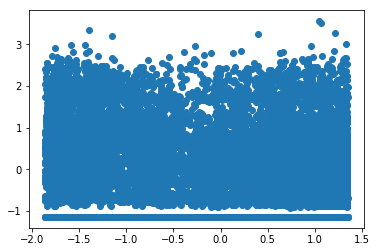

In [46]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(x[:,0],x[:,1], label='True Position') 
len(x)

In [49]:
kmeans_labels = []

# time batch before clustering
batch_no = 0
for i in range(0, len(x) - 1, 50):
    batch_no += 1
    
    #print('i: {}; i+2: {}'.format(i, i+50))
    #print(x[i:i+50])
    
    if i == len(x) - 51:
        x_grp = x[i:len(x)]
        #print('in: {}'.format(x_grp))
    else:
        x_grp = x[i:i+50]
    
    kmeans = KMeans(n_clusters=5)  
    kmeans.fit(x_grp)
    
    labels = [int(str(batch_no) + str(l)) for l in kmeans.labels_]
    kmeans_labels += labels

kmeans_labels
    

[13,
 13,
 11,
 14,
 11,
 10,
 11,
 10,
 13,
 12,
 11,
 11,
 11,
 13,
 14,
 13,
 11,
 14,
 11,
 14,
 11,
 11,
 13,
 13,
 11,
 11,
 11,
 12,
 12,
 13,
 14,
 13,
 11,
 11,
 13,
 11,
 10,
 11,
 11,
 12,
 10,
 12,
 11,
 12,
 14,
 11,
 13,
 12,
 10,
 13,
 22,
 20,
 24,
 21,
 22,
 24,
 21,
 23,
 23,
 22,
 22,
 20,
 20,
 23,
 22,
 22,
 22,
 20,
 21,
 20,
 24,
 24,
 24,
 22,
 24,
 22,
 20,
 22,
 20,
 23,
 23,
 22,
 20,
 22,
 23,
 23,
 22,
 23,
 24,
 21,
 23,
 21,
 21,
 23,
 20,
 20,
 21,
 21,
 21,
 23,
 33,
 32,
 32,
 34,
 30,
 31,
 33,
 33,
 33,
 34,
 34,
 30,
 30,
 32,
 32,
 32,
 33,
 31,
 34,
 31,
 32,
 34,
 34,
 34,
 31,
 34,
 30,
 32,
 33,
 30,
 30,
 34,
 30,
 32,
 30,
 30,
 30,
 32,
 31,
 31,
 34,
 33,
 30,
 30,
 32,
 33,
 30,
 31,
 31,
 31,
 41,
 41,
 41,
 41,
 41,
 40,
 41,
 40,
 43,
 43,
 41,
 43,
 40,
 42,
 43,
 41,
 42,
 41,
 42,
 41,
 44,
 41,
 40,
 41,
 41,
 41,
 44,
 44,
 40,
 43,
 40,
 40,
 40,
 43,
 41,
 40,
 44,
 41,
 40,
 43,
 43,
 40,
 40,
 40,
 41,
 40,
 43,
 41,
 40,
 43,


In [106]:
#kmeans = KMeans(n_clusters=5)  
#kmeans.fit(x) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [107]:
#print(kmeans.labels_)  

[0 2 2 2 2 0 0 0 0 3 3 3 3 0 3 3 3 3 3 3 1 1 1 4 1 4 1 1 1]


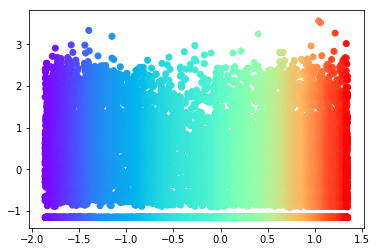

In [50]:
plt.scatter(x[:,0],x[:,1], c=np.array(kmeans_labels), cmap='rainbow')  

In [54]:
df['mood_label'] = kmeans_labels
df['emotion_vec'] = emotion_vec
len(set(kmeans_labels))

1730

In [52]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,text_cleaned,emotional_state,date,duration,mood_label,emotions_vector,emotion_vec
0,Twitter for iPhone,Democrats just blocked @FoxNews from holding a...,3/7/19 0:05,39620,163793,False,1.103450e+18,democrat block hold debat good think thing fak...,[[[0. 0. 0. 0. ...,2019-03-07 00:05:00,518100.0,13,"[0.0, 0.0, 0.0, 0.0, 0.33333333, 0.7345, 0.352...","[0.0, 0.0, 0.0, 0.0, 0.33333333, 0.7345, 0.352..."
1,Twitter for iPhone,Wall Street Journal: “More migrant families cr...,3/7/19 0:02,23578,94096,False,1.103450e+18,wall street journal migrant famili cross u ill...,[[[0.25 0.448 0.321 0.569]\n [0. 0. 0....,2019-03-07 00:02:00,518280.0,13,"[0.25, 0.448, 0.321, 0.569, 0.0, 0.0, 0.0, 0.0...","[0.25, 0.448, 0.321, 0.569, 0.0, 0.0, 0.0, 0.0..."
2,Twitter for iPhone,Congressman Chris Stewart: “No one is accusing...,3/6/19 23:56,24546,88892,False,1.103440e+18,congressman chri stewart one accus presid crim...,[[[0.5 0.071 0.943 0.63 ]\n [0. 0. 0....,2019-03-06 23:56:00,518640.0,11,"[0.5, 0.071, 0.943, 0.63, 0.0, 0.0, 0.0, 0.0, ...","[0.5, 0.071, 0.943, 0.63, 0.0, 0.0, 0.0, 0.0, ..."
3,Twitter for iPhone,American Workforce Policy Advisory Board Meeti...,3/6/19 22:04,10818,43018,False,1.103420e+18,american workforc polici advisori board meet,[[[0. 0. 0. 0. ]\n [1. 0.592 0....,2019-03-06 22:04:00,525360.0,14,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.592, 0.255, 0.385,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.592, 0.255, 0.385,..."
4,Twitter for iPhone,It is shameful that House Democrats won’t take...,3/6/19 19:50,28268,107157,False,1.103380e+18,shame hous democrat take stronger stand anti s...,[[[0.25 0.102 0.793 0.625]\n [0. 0. 0....,2019-03-06 19:50:00,533400.0,11,"[0.25, 0.102, 0.793, 0.625, 0.0, 0.0, 0.0, 0.0...","[0.25, 0.102, 0.793, 0.625, 0.0, 0.0, 0.0, 0.0..."


In [116]:
OUTPUT_PATH = './data/moods_subset.csv'
mood_df = []
for mood, group in df.groupby('mood_label'):
    print(mood)
    emotion_vec = []
    tweets = ''
    for index, row in group.iterrows():
        
        emotion_vec.append(row['emotion_vec'])
        tweets = tweets + row['text_cleaned']
        
        #print(row['emotion_vec'])
    
    emotion_vec = np.array(emotion_vec)
    mood_vec = np.mean(emotion_vec, axis=0)
    print(mood_vec)
    mood_df.append({
        'mood_label': mood,
        'mood_vec': mood_vec,
        'tweets_text': tweets
    })

mood_df = pd.DataFrame(mood_df)
mood_df.to_csv(OUTPUT_PATH, sep=',', encoding='utf-8', index=False)

0
[0.0515873  0.23766667 0.18466667 0.246      0.2515873  0.59183333
 0.43491667 0.55208333 0.05714286 0.11133333 0.17116667 0.12766667
 0.02380952 0.02883333 0.08983333 0.05466667 0.1765873  0.70683333
 0.43266667 0.6015     0.02777778 0.097      0.08333333 0.10816667
 0.15436508 0.5755     0.47533333 0.55716667 0.25714286 0.62466667
 0.43858333 0.57933333]
1
[0.33928571 0.09552381 0.43338095 0.3517381  0.03571429 0.09071429
 0.03985714 0.04885714 0.125      0.074      0.27185714 0.211
 0.08928571 0.07071429 0.20914286 0.15614286 0.         0.
 0.         0.         0.08928571 0.05657143 0.10728571 0.09471429
 0.         0.         0.         0.         0.03571429 0.10014286
 0.06021429 0.09535714]
2
[0.25    0.15525 0.51425 0.456   0.25    0.148   0.06375 0.09625 0.0625
 0.015   0.1675  0.03875 0.125   0.127   0.24775 0.181   0.      0.
 0.      0.      0.125   0.127   0.24775 0.181   0.      0.      0.
 0.      0.1875  0.258   0.2285  0.4245 ]
3
[0.09761905 0.0369     0.2085     0.1

In [126]:
MOOD_PATH = './data/moods_subset.csv'
from collections import Counter
mood_df = pd.read_csv(MOOD_PATH, error_bad_lines=False, index_col=False)

tf_scores = []
all_words = set()

for index, row in mood_df.iterrows():
    
    words = row['tweets_text'].split()
    num_words = len(words)
    word_freq = Counter(words)
    print('\n')
    
    for wrd, freq in word_freq.items():
        
        all_words.add(wrd)
        tf_scores.append({
            'mood_id': row['mood_label'],
            'word': wrd,
            'tf': freq/num_words
        })
        
tf_scores
all_words


{'00',
 '1',
 '1500',
 '2020',
 '2nd',
 '300',
 '81',
 '93',
 'absolut',
 'accus',
 'act',
 'actual',
 'adam',
 'address',
 'admiss',
 'admit',
 'advisori',
 'ago',
 'america',
 'amp',
 'analysi',
 'anti',
 'anyth',
 'approv',
 'arrest',
 'ask',
 'aspect',
 'atroc',
 'author',
 'aw',
 'back',
 'basi',
 'bebest',
 'behind',
 'bid',
 'big',
 'biggest',
 'block',
 'blockbust',
 'board',
 'border',
 'campaignweirdo',
 'career',
 'center',
 'chairman',
 'chri',
 'clinton',
 'cnn',
 'cold',
 'collud',
 'collus',
 'coloss',
 'comment',
 'commission',
 'committe',
 'concern',
 'condemn',
 'confer',
 'confirm',
 'constitution',
 'copi',
 'countri',
 'countrirepres',
 'crazi',
 'crime',
 'crimin',
 'crook',
 'cross',
 'cure',
 'dark',
 'day',
 'debat',
 'debatsenat',
 'decad',
 'decis',
 'dem',
 'democrat',
 'desper',
 'display',
 'dnc',
 'doctor',
 'documentamerican',
 'done',
 'donerealiz',
 'dossier',
 'drug',
 'ed',
 'elect',
 'emergcongressman',
 'enrich',
 'entir',
 'eo',
 'etc',
 'even',


In [131]:
import math
idf_scores = {}
word_doc_counts = {}
num_moods = len(mood_df)

for wrd in all_words:
    word_doc_counts[wrd] = 0

for wrd in all_words:
    
    for md in tf_scores:

        if md['word'] == wrd:
            
            word_doc_counts[wrd] += 1
            
for wrd in all_words:
    
    idf_scores[wrd] = math.log(num_moods/word_doc_counts[wrd])
    

idf_scores

{'resort': 1.6094379124341003,
 'subject': 1.6094379124341003,
 'atroc': 1.6094379124341003,
 'rate': 1.6094379124341003,
 'proof': 1.6094379124341003,
 'anti': 1.6094379124341003,
 'subpoenahan': 1.6094379124341003,
 'dossier': 1.6094379124341003,
 'committe': 1.6094379124341003,
 'ask': 1.6094379124341003,
 'ilhan': 1.6094379124341003,
 'admit': 1.6094379124341003,
 'modern': 1.6094379124341003,
 'adam': 1.6094379124341003,
 'servic': 1.6094379124341003,
 'jimbo': 1.6094379124341003,
 'get': 0.9162907318741551,
 'talkrt': 1.6094379124341003,
 'crime': 0.9162907318741551,
 'start': 1.6094379124341003,
 'person': 1.6094379124341003,
 'greatli': 1.6094379124341003,
 'ladi': 1.6094379124341003,
 'live': 1.6094379124341003,
 'first': 0.9162907318741551,
 'decis': 1.6094379124341003,
 'fda': 1.6094379124341003,
 'urban': 1.6094379124341003,
 'think': 1.6094379124341003,
 'help': 1.6094379124341003,
 'network': 1.6094379124341003,
 'aw': 1.6094379124341003,
 'know': 1.6094379124341003,
 'ha

In [132]:
tf_idf_scores = []

for tf in tf_scores:
    
    tf_idf_scores.append({
        'mood_id': tf['mood_id'],
        'word': tf['word'],
        'tf-idf': tf['tf'] * idf_scores[tf['word']] 
    })

tf_idf_scores

[{'mood_id': 0, 'word': 'democrat', 'tf-idf': 0.01344277957278923},
 {'mood_id': 0, 'word': 'block', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'hold', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'debat', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'good', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'think', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'thing', 'tf-idf': 0.012056456998344145},
 {'mood_id': 0, 'word': 'fake', 'tf-idf': 0.04235362927458158},
 {'mood_id': 0, 'word': 'news', 'tf-idf': 0.012056456998344145},
 {'mood_id': 0, 'word': 'network', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'radic', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'left', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'gener', 'tf-idf': 0.012056456998344145},
 {'mood_id': 0, 'word': 'elect', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, 'word': 'debatsenat', 'tf-idf': 0.02117681463729079},
 {'mood_id': 0, '